# Marketing Campaign Simulation Modeling

We would like to model if a bank client would buy an investment product. We need to select a group of clients to be contacted, e.g., by phone, about the investment product. Our goal is to maximize sales (number of clients that buy the product) and minimize cost of contact (cost of contacting the client, e.g., salary of client representatives). To achieve our goal we can simulate marketing campaign for the sales using probabilities of sales for each client that we have in the dataset. Simulation modeling would allow us to select parameters min_probability and max_Probability that give us a list of clients that need to be contacted.   
To enhance our model we can try compute if phone call to a client would increase or decrease a probability of sale (sales uplift) if we have data about previous contacts with clients. As we do not have it, we would choose a simple model of "uplift" - probability of sale will increase by 10% if a clients gets a call from the client representative.

### Objective
1) Maximize the sales  
2) Minimize the cost of contacting the clients  

We have the input => probabilities of sales for each client. Based on this sales probability, we need to find how much we are going to spend for the client so that they would buy an investment product.  

In [1]:
import pandas as pd
try:
    from ggplot import *
except:
    !pip install ggplot
from ggplot.scales.scale_color_gradient import *

from pylab import rcParams

D:\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('sale_probability.csv')
data.head()

,probabilities
0,0.032355
1,0.033055
2,0.012665
3,0.037067
4,0.016160


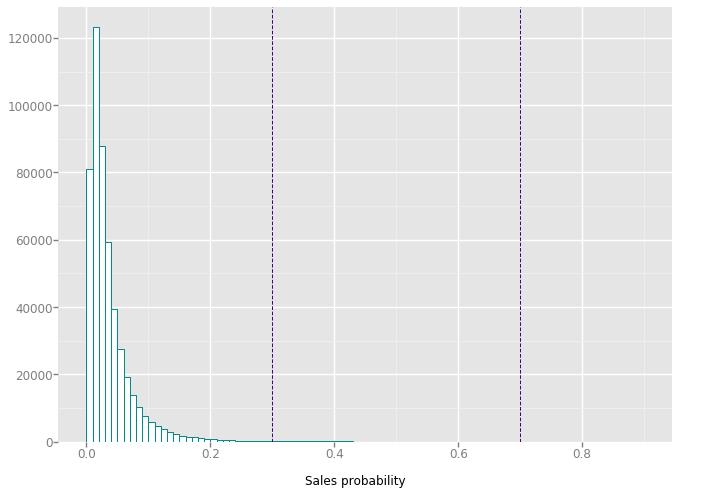

<ggplot: (142009736000)>

In [5]:
ggplot(aes(x='Sales probability'), data=pd.DataFrame({ 'Sales probability' : data['probabilities'] })) \
    + geom_histogram(binwidth=0.01, color='darkcyan', fill="white") \
    + geom_vline(x=[0.30, 0.70], linetype='dashed', color="indigo")

In [6]:
import numpy.random as rnd
import numpy as np

# 1) Discuss the provided code and how it is solving the problem at hand

### Pseudocode:
- Sales probability is available in the input file sale_probability.csv
- Profit is calculated for number of simulations as follows:
    - The probability range is 0.0 to 1.0 in iterations of 0.1 [0-0.1, 0.1-0.2, 0.2-0.3,..., 0.9-1.0] totaling 10
    - for the minimum probability ranging from 0.0-0.9 and maximum probability ranging from 0.1-1.0
        * Identify the target group - list of probability ranging from minimum to maximum probability.
        * create a new dataframe data_after_contact copied from the sale probability and add 0.1 to the probability values.
        * for every simulation:
            - compute sales by applying montecarlo (monte_carlo_coin) function to the probabilities. (Function definition is below).
            - compute the sale for the simulation by summing the sales (after monte carlo)
            - compute the number of calls based on the target group.
            - compute the profit based on sales and calls (function definition is below).
        * Compute final profit = final profit/Number of Simulations.
        

### Function definitions

- <b>monte_carlo_coin</b>: Montecarlo function is used to determine the number of leads for sales. For every probability in the list to be contacted (minimum and maximum probability range), monte_carlo_coin function is applied. This function generates a random number from uniform distribution and compares it against the sales probability. If the random value generated is less than the sales probability from the file, then return probability of 1, else return 0  
- <b>profit</b>: Calculating profit per sale based on minimum & maximum profits.  
$$profit=N_{sales}*avg(income_{sale})-N_{contacts}*avg(costs_{contact})$$
Income and costs are defined to be constants 10 and 2. 
- <b>profit simulation</b> - calculate the profits based on the sales probability between min_probability and max_probability values.

### CONCLUSION

The objective of the code is to maximize the profit and the code is calculating the profit for the sales using probabilities of sales for each client that we have in the dataset. 

We have the input => probabilities of sales for each client. Based on this sales probability, we need to find how much we are going to spend for the client so that they would buy an investment product. Montecarlo method is used to randomly generate the number and decide the sales (based on minimum and maximum probabilities). 

1) The more the number of simulations, the system slows down and it becomes expensive to do the simulations.
2) There is not much difference in the maximum profit average and standard deviation.


In [7]:
def monte_carlo_coin(probability):
    r = rnd.uniform()
    return int(r < probability)

def profit(n_sales, n_contacts):
    avg_income_sale = 10.0
    avg_costs_contact = 2.0
    return n_sales*avg_income_sale - n_contacts*avg_costs_contact

In [8]:
def profit_simulation(n_simulation):
    result = []
    for min_probability in np.arange(0.0,0.9,0.1):
        for max_probability in np.arange(min_probability+0.1,1.0,0.1):
            # uplift
            # Returns series of boolean values depending on whether the sales probability is between min_probability and max_probability
            # This is the target group we are going to call
            target_group = data.probabilities.between(min_probability, max_probability)
            data_after_contact = data.copy()
            data_after_contact.ix[target_group, 'probabilities'] = data.ix[target_group].probabilities + 0.1

            prof = 0
            for _ in range(n_simulation):
                # simulation
                data_after_contact['sales'] = data_after_contact['probabilities'].apply(monte_carlo_coin)

                # results
                sales = data_after_contact['sales'].sum(axis=0)
                calls = target_group.sum(axis=0)
                prof += profit(sales, calls)
            prof /= n_simulation
            result.append((min_probability, max_probability, sales, calls, prof))
    return(result)

# 2) Simulation results for simulations 2, 4, 6, 8, 10, 15, 20, 25, 30, 50, 100

In [9]:
result2 = profit_simulation(2)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [10]:
result4 = profit_simulation(4)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [11]:
result6 = profit_simulation(6)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [12]:
result8 = profit_simulation(8)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [13]:
result10 = profit_simulation(10)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [14]:
result15 = profit_simulation(15)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [15]:
result20 = profit_simulation(20)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [16]:
result25 = profit_simulation(25)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [17]:
result30 = profit_simulation(30)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [18]:
result50 = profit_simulation(50)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [19]:
result100 = profit_simulation(100)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# 3) Create new dataframes for the results and their simulations

In [23]:
result2_df = pd.DataFrame(result2, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result4_df = pd.DataFrame(result4, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result6_df = pd.DataFrame(result6, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result8_df = pd.DataFrame(result8, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result10_df = pd.DataFrame(result10, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result15_df = pd.DataFrame(result15, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result20_df = pd.DataFrame(result20, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result25_df = pd.DataFrame(result25, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result30_df = pd.DataFrame(result30, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result50_df = pd.DataFrame(result50, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])
result100_df = pd.DataFrame(result100, columns=['Minimal probability', 'Maximum probability', 'No of sales', 'No of calls', 'Profit'])

In [39]:
result2_df['Num of Simulations'] = 2
result4_df['Num of Simulations'] = 4
result6_df['Num of Simulations'] = 6
result8_df['Num of Simulations'] = 8
result10_df['Num of Simulations'] = 10
result15_df['Num of Simulations'] = 15
result20_df['Num of Simulations'] = 20
result25_df['Num of Simulations'] = 25
result30_df['Num of Simulations'] = 30
result50_df['Num of Simulations'] = 50
result100_df['Num of Simulations'] = 100

# 4) Plots of different Simulations and the profits

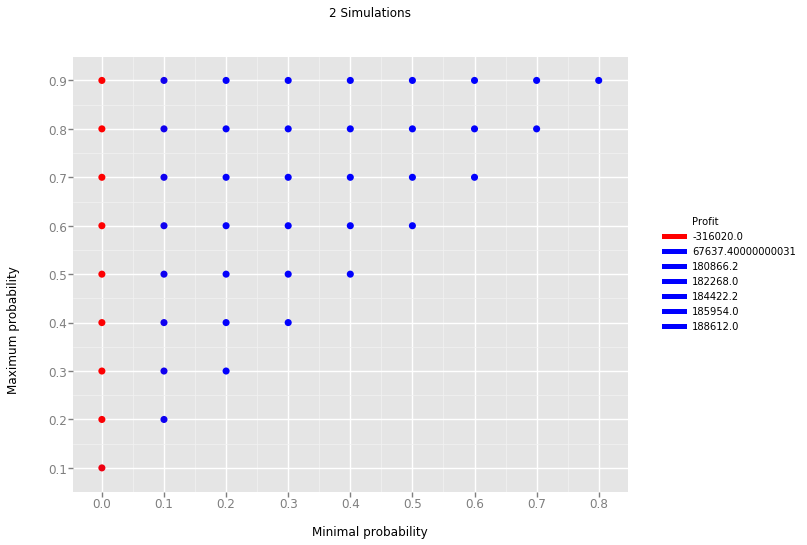

<ggplot: (-9223371894842621608)>

In [28]:
ggplot(result2_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('2 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')

In [73]:
print("Maximum profit values for 2 simulations:")
result2_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 2 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
41,0.6,0.9,18858,89,188612.0,2
24,0.3,0.4,18963,890,187320.0,2
36,0.5,0.7,18810,187,187061.0,2


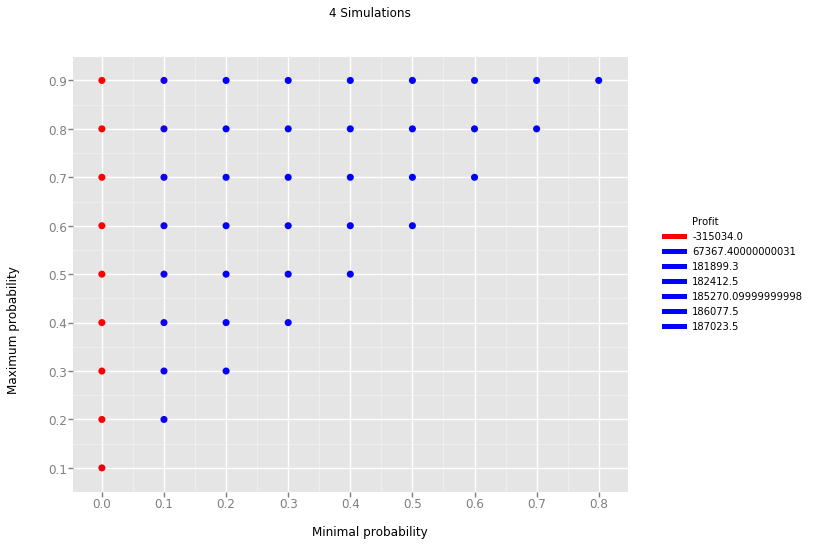

<ggplot: (-9223371894842651753)>

In [29]:
ggplot(result4_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('4 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')

In [74]:
print("Maximum profit values for 4 simulations:")
result4_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 4 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
36,0.5,0.7,18736,187,187023.5,4
40,0.6,0.8,18726,77,186758.5,4
24,0.3,0.4,18903,890,186552.5,4


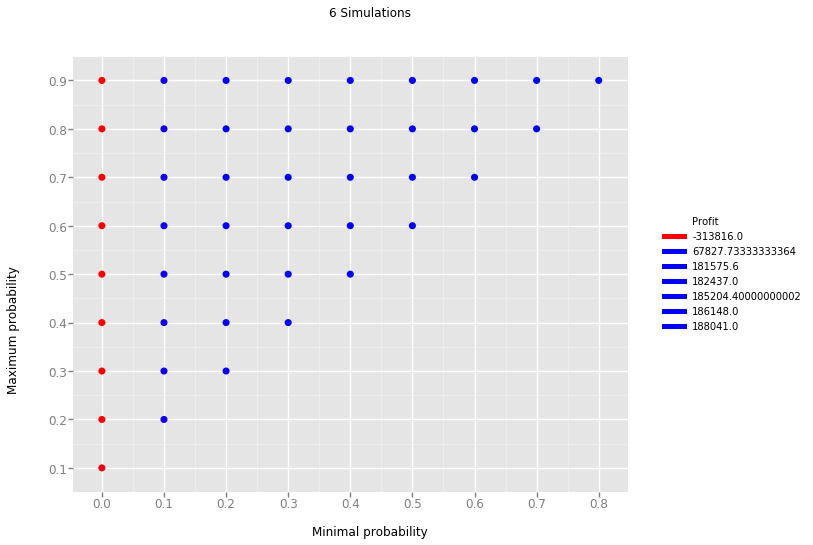

<ggplot: (142012312177)>

In [30]:
ggplot(result6_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('6 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')


In [75]:
print("Maximum profit values for 6 simulations:")
result6_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 6 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
40,0.6,0.8,19006,77,188041.000000,6
44,0.8,0.9,18870,12,187209.333333,6
39,0.6,0.7,18826,49,186982.000000,6


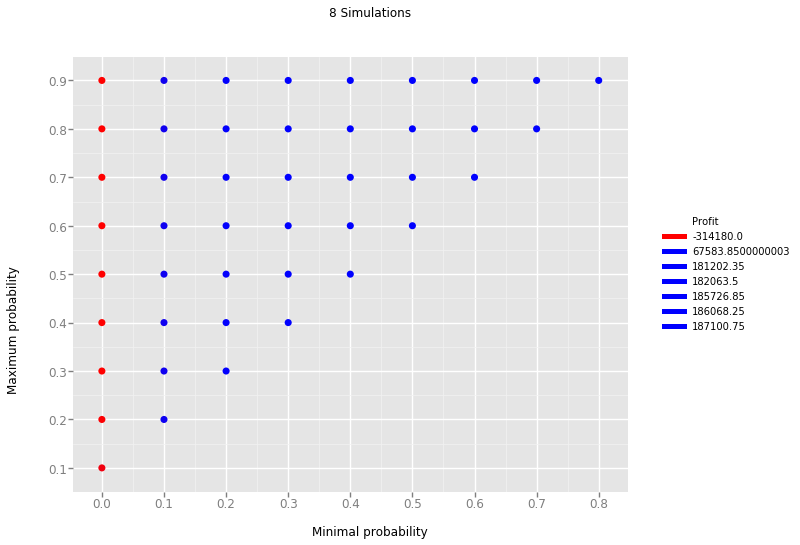

<ggplot: (142012362283)>

In [31]:
ggplot(result8_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('8 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')

In [76]:
print("Maximum profit values for 8 simulations:")
result8_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 8 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
39,0.6,0.7,18688,49,187100.75,8
36,0.5,0.7,18799,187,186879.75,8
35,0.5,0.6,18685,138,186726.50,8


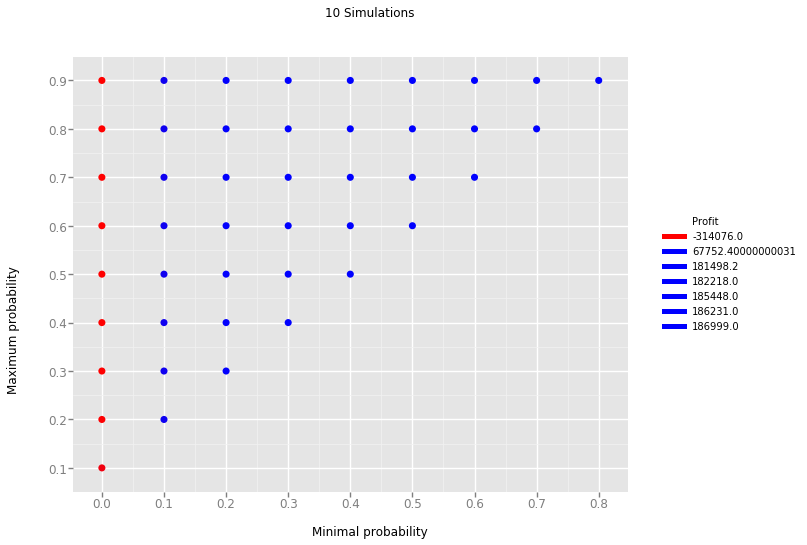

<ggplot: (142013259542)>

In [32]:
ggplot(result10_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('10 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')


In [77]:
print("Maximum profit values for 10 simulations:")
result10_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 10 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
31,0.4,0.6,18753,439,186999.0,10
40,0.6,0.8,18779,77,186912.0,10
39,0.6,0.7,18478,49,186864.0,10


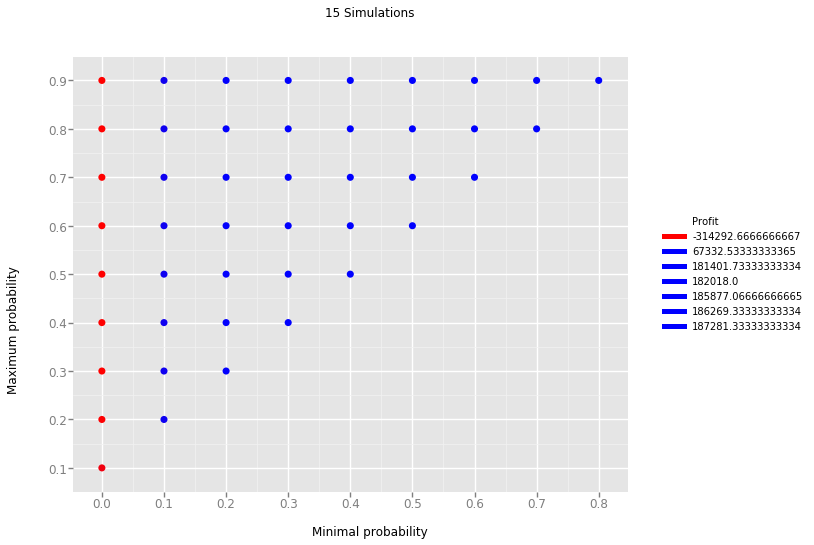

<ggplot: (142013163612)>

In [33]:
ggplot(result15_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('15 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')


In [78]:
print("Maximum profit values for 15 simulations:")
result15_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 15 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
44,0.8,0.9,18590,12,187281.333333,15
39,0.6,0.7,18657,49,186860.000000,15
42,0.7,0.8,18730,28,186824.666667,15


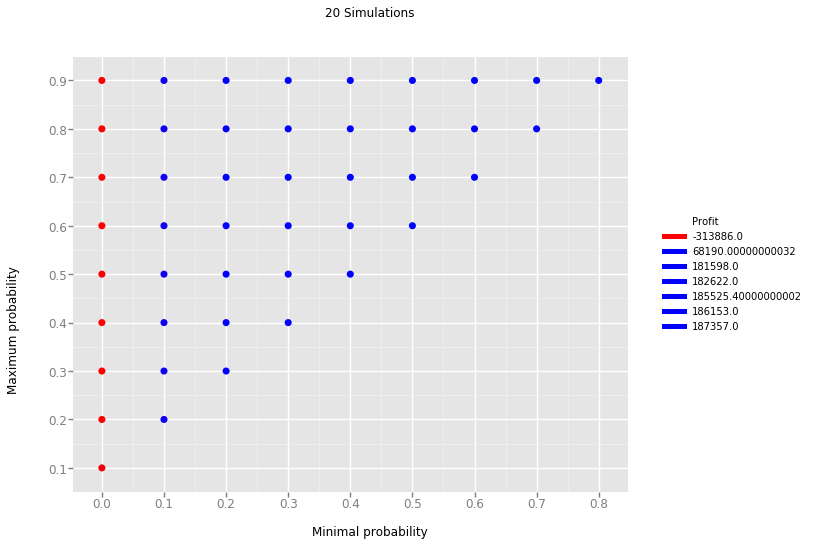

<ggplot: (142013204828)>

In [34]:
ggplot(result20_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('20 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')


In [79]:
print("Maximum profit values for 20 simulations:")
result20_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 20 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
44,0.8,0.9,18992,12,187357.0,20
43,0.7,0.9,18768,40,187039.5,20
42,0.7,0.8,18758,28,186835.5,20


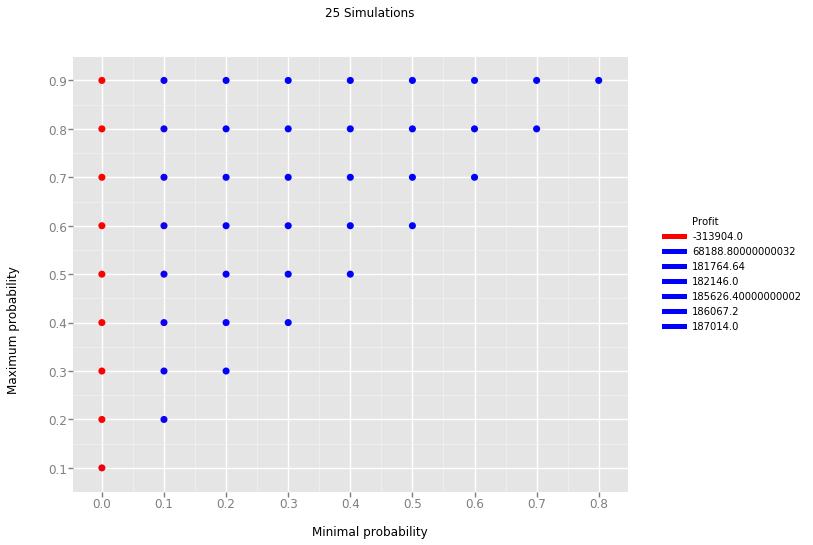

<ggplot: (-9223371894842004487)>

In [35]:
ggplot(result25_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('25 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')

In [80]:
print("Maximum profit values for 25 simulations:")
result25_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 25 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
44,0.8,0.9,18928,12,187014.0,25
30,0.4,0.5,18694,301,186859.6,25
43,0.7,0.9,18782,40,186848.8,25


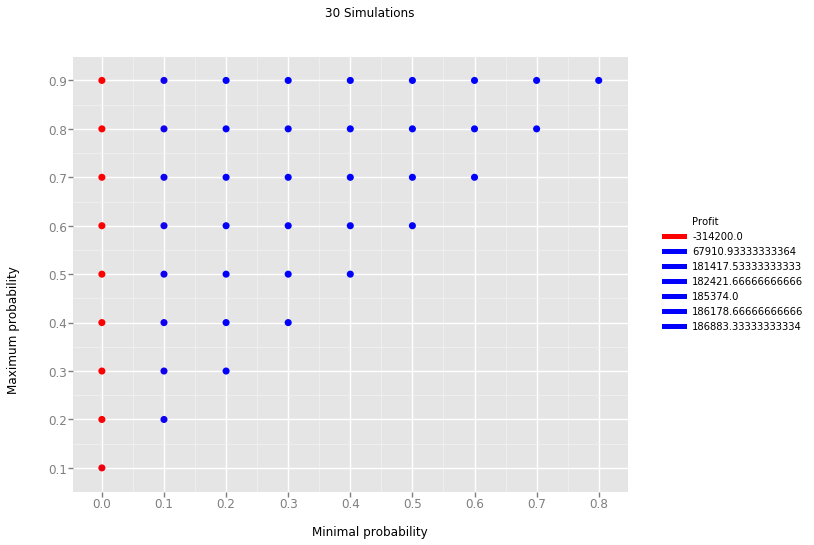

<ggplot: (-9223371894841830663)>

In [36]:
ggplot(result30_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('30 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')

In [81]:
print("Maximum profit values for 30 simulations:")
result30_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 30 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
33,0.4,0.8,18930,516,186883.333333,30
39,0.6,0.7,18555,49,186851.666667,30
40,0.6,0.8,18485,77,186665.000000,30


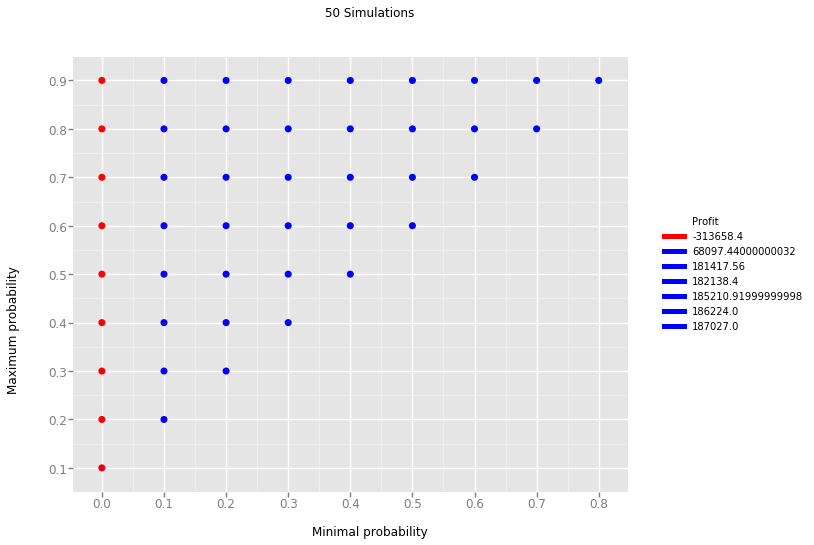

<ggplot: (142013004492)>

In [37]:
ggplot(result50_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('50 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')


In [82]:
print("Maximum profit values for 50 simulations:")
result50_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 50 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
37,0.5,0.8,18718,215,187027.0,50
41,0.6,0.9,18671,89,186660.0,50
35,0.5,0.6,18825,138,186601.8,50


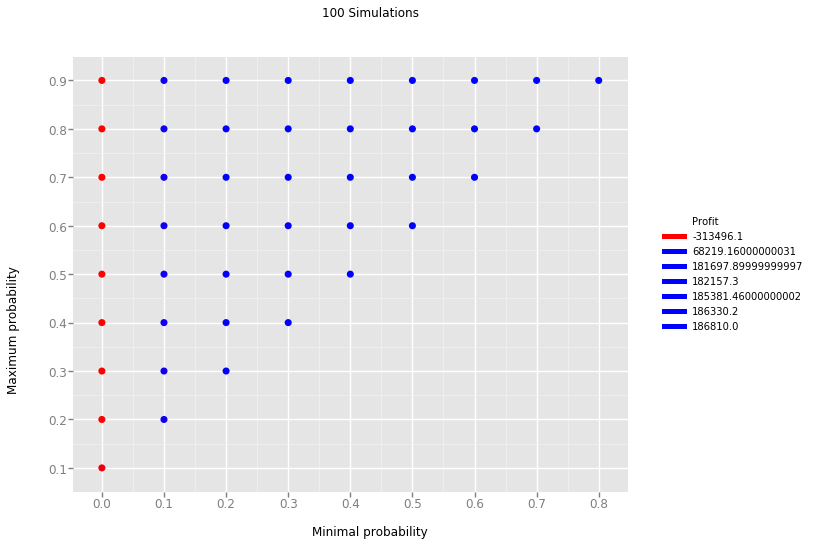

<ggplot: (-9223371894841701074)>

In [38]:
ggplot(result100_df, aes(x='Minimal probability', y='Maximum probability', color='Profit')) + \
    ggtitle('100 Simulations') + \
    geom_point(size=50) + \
    scale_color_gradient(low='red', high='blue')

In [83]:
print("Maximum profit values for 100 simulations:")
result100_df.sort_values(by='Profit', ascending=False).head(3)

Maximum profit values for 100 simulations:


,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
41,0.6,0.9,18872,89,186810.0,100
35,0.5,0.6,18818,138,186801.4,100
43,0.7,0.9,18566,40,186721.5,100


# 5) Create a new dataframe combining the results of all the simulations

In [40]:
all_simul_df = pd.concat([result2_df, result4_df, result6_df, result8_df, result10_df, result15_df, result20_df, result25_df, result30_df, result50_df, result100_df])
all_simul_df.head()

,Minimal probability,Maximum probability,No of sales,No of calls,Profit,Num of Simulations
0,0.0,0.1,65624,469278,-281641.0,2
1,0.0,0.2,68397,494973,-307171.0,2
2,0.0,0.3,68342,498564,-311263.0,2
3,0.0,0.4,68847,499454,-311403.0,2
4,0.0,0.5,68691,499755,-311905.0,2


In [41]:
all_simul_df.shape

(495, 6)

### 5.1) Probability Vs Profit plots

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


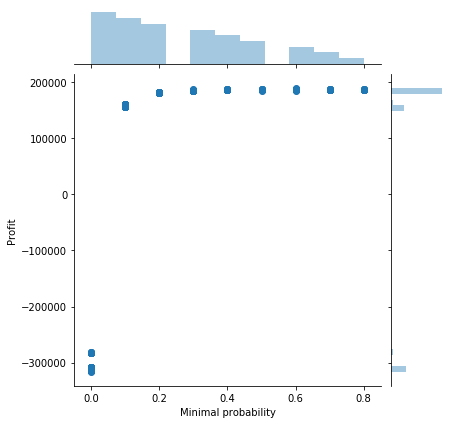

In [86]:
sns.jointplot(x='Minimal probability', y='Profit', data=all_simul_df)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


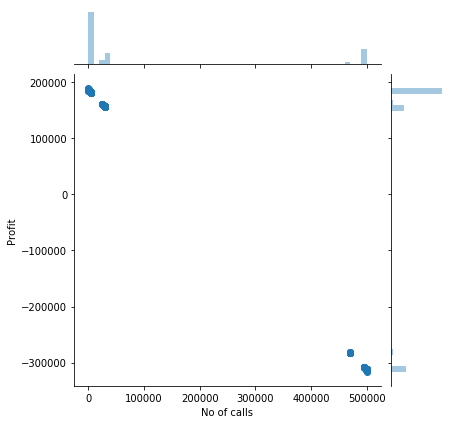

In [46]:
sns.jointplot(x='No of calls', y='Profit', data=all_simul_df)

####  Probability >= 0.4 results in more profit
#### More number of calls results in more expenses and results in lower profits

The objective of the problem is to maximize the sales and minimize the cost of contact. In other words, maximizing the profit after considering the cost and sales.

Profit is calculated as n_sales*avg_income_sale - n_contacts*avg_costs_contact

This code is calculating the profit for probability range and shows where the profit is maximized. 

# 6) Investigate the results of possible runs from 1-30 (or maybe higher) and see when does the profit start to stabilize?

### 6.1) The maximum profit and the corresponding probabilites

In [125]:
grp_max = all_simul_df.groupby('Num of Simulations').apply(lambda x: x.loc[x.Profit == x.Profit.max(),[ 'Minimal probability', 'Maximum probability', 'Profit']])
grp_max.reset_index(0, inplace=True)
grp_max

,Num of Simulations,Minimal probability,Maximum probability,Profit
41,2,0.6,0.9,188612.000000
36,4,0.5,0.7,187023.500000
40,6,0.6,0.8,188041.000000
39,8,0.6,0.7,187100.750000
31,10,0.4,0.6,186999.000000
44,15,0.8,0.9,187281.333333
44,20,0.8,0.9,187357.000000
44,25,0.8,0.9,187014.000000
33,30,0.4,0.8,186883.333333
37,50,0.5,0.8,187027.000000


### Overall maximum profit is got for the probability range of 0.4 to 0.9

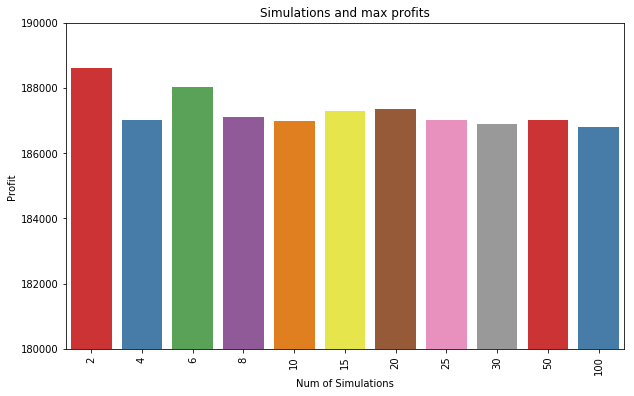

In [127]:
plt.figure(figsize=(10,6))
g = sns.barplot(x=grp_max['Num of Simulations'], y=grp_max['Profit'], palette = 'Set1')
plt.ylim(180000, 190000)
plt.title('Simulations and max profits');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

### There is not much difference in the max profits for different simulations. I couldnt try simulations >100 as they were taking more time. The results are shows in section #8
### They seem to be more stable as the simulations increase.

### Same observation for profits Average 

### 6.2) Average profits and the number of simulations

In [51]:
grp_mean = all_simul_df[['Profit','Num of Simulations']].groupby('Num of Simulations').mean()
grp_mean

,Profit
Num of Simulations,
2,81235.666667
4,81197.944444
6,81315.259259
8,81124.138889
10,81316.377778
15,81242.488889
20,81325.822222
25,81308.933333
30,81199.133333


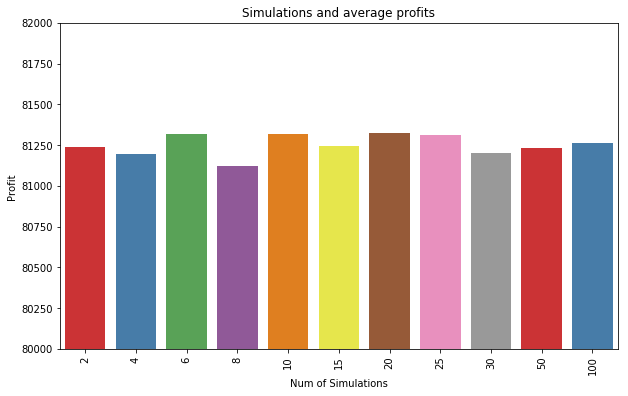

In [69]:
plt.figure(figsize=(10,6))
g = sns.barplot(x=grp_mean.index, y=grp_mean['Profit'], palette = 'Set1')
plt.ylim(80000, 82000)
plt.title('Simulations and average profits');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

### 6.3) Standard deviation of the profits and the number of simulations

In [138]:
grp_std = all_simul_df[['Profit','Num of Simulations']].groupby('Num of Simulations').std()
grp_std

,Profit
Num of Simulations,
2,197528.882543
4,197681.165482
6,197684.679962
8,197873.297270
10,197693.661390
15,197823.287720
20,197583.780526
25,197690.011323
30,197694.673324


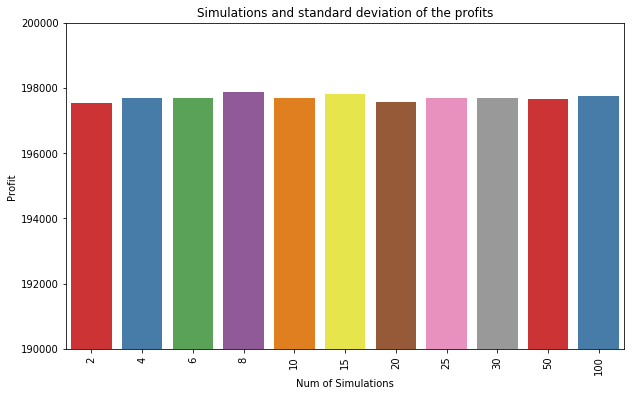

In [139]:
plt.figure(figsize=(10,6))
g = sns.barplot(x=grp_std.index, y=grp_std['Profit'], palette = 'Set1')
plt.ylim(190000, 200000)
plt.title('Simulations and standard deviation of the profits');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

# 7) Find the mean and standard deviation for the simulations

## Mean for the simulations

In [140]:
grp_mean

,Profit
Num of Simulations,
2,81235.666667
4,81197.944444
6,81315.259259
8,81124.138889
10,81316.377778
15,81242.488889
20,81325.822222
25,81308.933333
30,81199.133333


## Standard deviation for the simulations

In [141]:
grp_std

,Profit
Num of Simulations,
2,197528.882543
4,197681.165482
6,197684.679962
8,197873.297270
10,197693.661390
15,197823.287720
20,197583.780526
25,197690.011323
30,197694.673324
